About this file
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
import os
cdir = "D:/WORKS/3. California/"
os.chdir(cdir)

In [2]:
import warnings
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("housing.csv.zip")

In [5]:
df.shape

(20640, 10)

In [6]:
df.isnull().sum(), df.duplicated().sum()

(longitude               0
 latitude                0
 housing_median_age      0
 total_rooms             0
 total_bedrooms        207
 population              0
 households              0
 median_income           0
 median_house_value      0
 ocean_proximity         0
 dtype: int64,
 0)

**total_bedrooms have 207 missing entries**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ISLAND>NEAR BAY>NEAR OCEAN>1H OCEAN>INLAND

In [8]:
df["ocean_proximity"] = df["ocean_proximity"].replace({'ISLAND':5, 'NEAR BAY':4, 'NEAR OCEAN':3, '<1H OCEAN':2, 'INLAND':1})

df["ocean_proximity"] = df["ocean_proximity"].astype(int)

In [9]:
num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 
          'median_income', 'median_house_value']

In [10]:
df["longitude"] = abs(df["longitude"])

In [11]:
df["median_house_value"] = df["median_house_value"]/10000

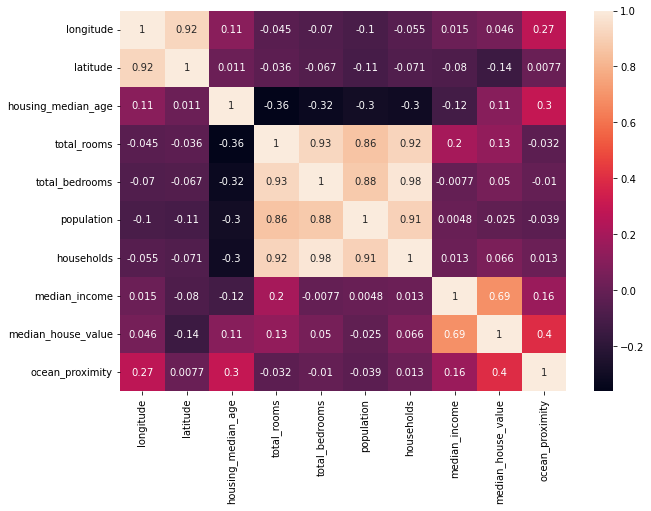

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True);

**total_rooms, total_bedrooms, population, households**

In [13]:
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

================================================================================================

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,20.685582,2.034012
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,11.539562,0.943948
min,114.310000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,1.499900,1.000000
25%,118.010000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,11.960000,1.000000
50%,118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,17.970000,2.000000
75%,121.800000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,26.472500,2.000000
max,124.350000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,50.000100,5.000000


In [15]:
df["longitude"].min(), df["longitude"].max()

(114.31, 124.35)

In [16]:
df["longitude_"] = pd.qcut(df["longitude"], [0,.25,.50,.75,1], duplicates="drop", labels=["W1","W2","W3","W4"])
df["latitude_"] = pd.qcut(df["latitude"], [0,.25,.50,.75,1], duplicates="drop", labels=["N1","N2","N3","N4"])

In [17]:
df["longitude_"] = df["longitude_"].astype(object)
df["latitude_"] = df["latitude_"].astype(object)

In [18]:
df["location"] = df["latitude_"]+df["longitude_"]

In [19]:
df["location"] = df["location"].replace({"N3W4":11, "N2W3":10, "N1W2":9, "N2W2":8, "N4W4":7, "N1W1":6, "N3W2":5, "N2W1":4, 
                                         "N4W3":3, "N3W3":2, "N3W1":1})

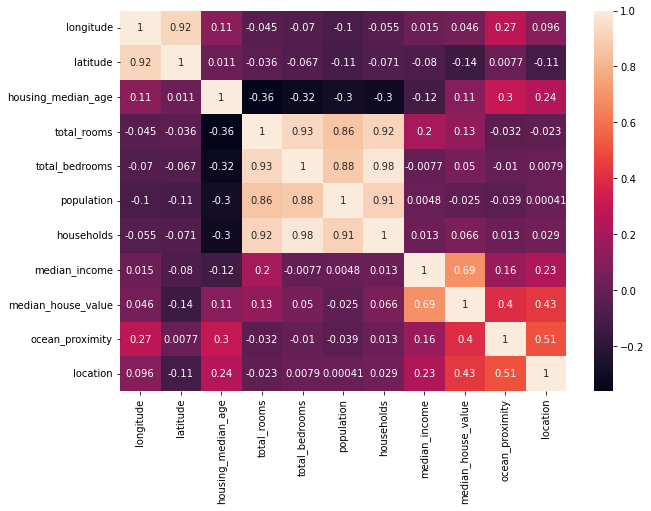

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True);

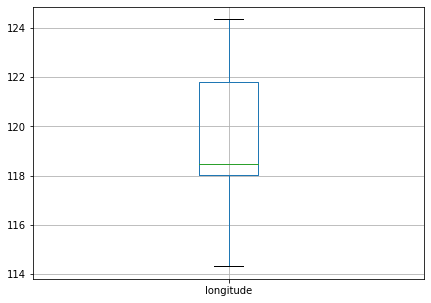

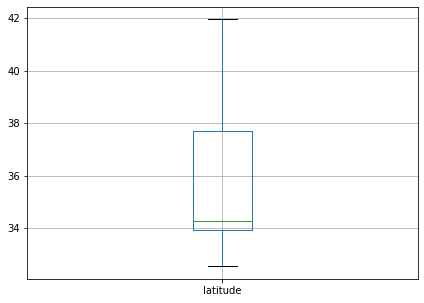

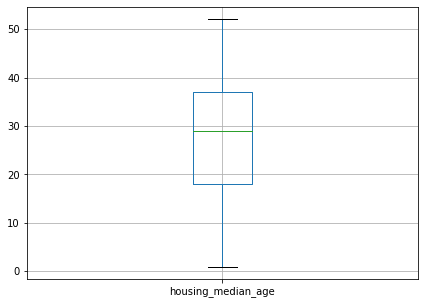

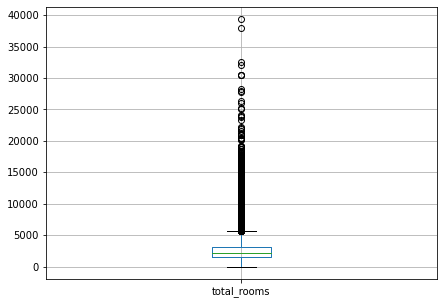

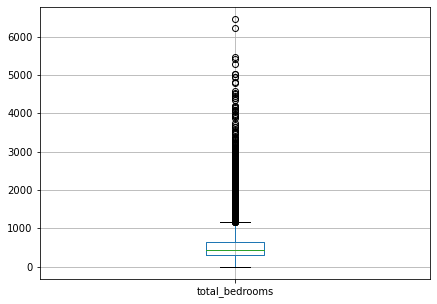

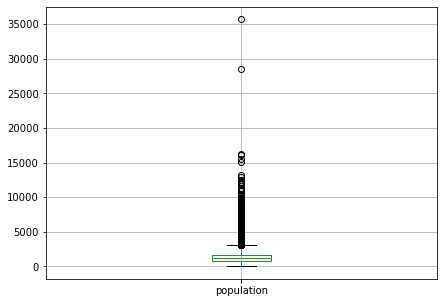

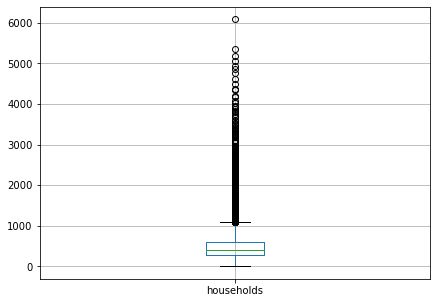

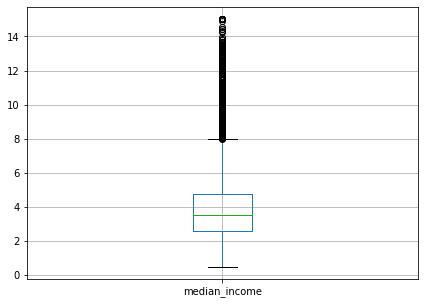

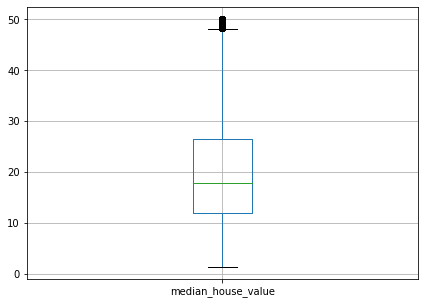

In [21]:
for i in num:
    df[[i]].boxplot(figsize=(7,5))
    plt.show()

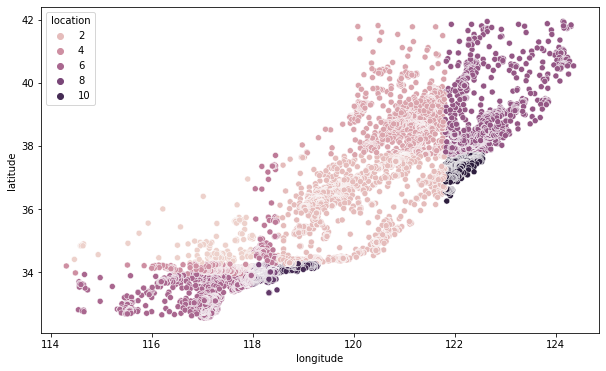

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="longitude", y="latitude" , hue="location")
plt.show()

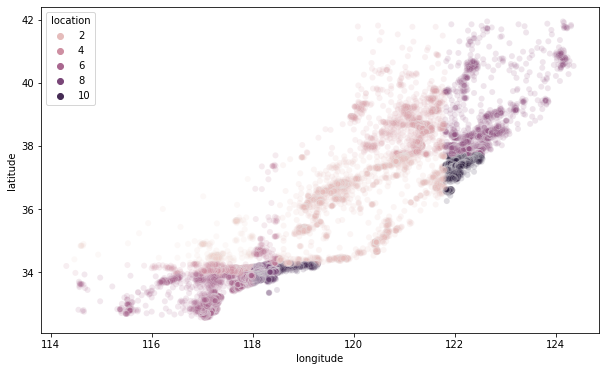

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="longitude", y="latitude" , hue="location", alpha=.15)
plt.show()

In [24]:
from sklearn.impute import KNNImputer
X = df[["total_rooms","total_bedrooms","population","households"]]
imputer = KNNImputer(n_neighbors=2)
X = pd.DataFrame(imputer.fit_transform(X), columns=["total_rooms","total_bedrooms","population","households"])

df["total_bedrooms"] = round(X["total_bedrooms"])

In [25]:
df["age_per_value"] = df["housing_median_age"]/df["median_house_value"]

df["rooms_per_bedroom"] = df["total_rooms"]/df["total_bedrooms"]

df["age_per_income"] = df["housing_median_age"]/df["median_income"]

df["households_per_person"] = df["households"]/df["population"]

df["rooms_per_person"] = df["total_rooms"]/df["population"]

df["households_per_room"] = df["households"]/df["total_rooms"]

In [26]:
for col in ['ocean_proximity', 'location',]:
    df[col] = df[col] - df[col].mean()

<AxesSubplot:>

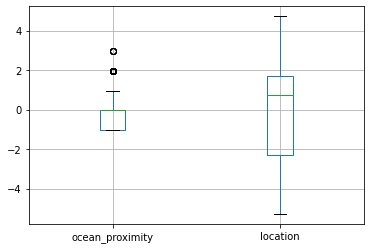

In [27]:
df[["ocean_proximity","location"]].boxplot()

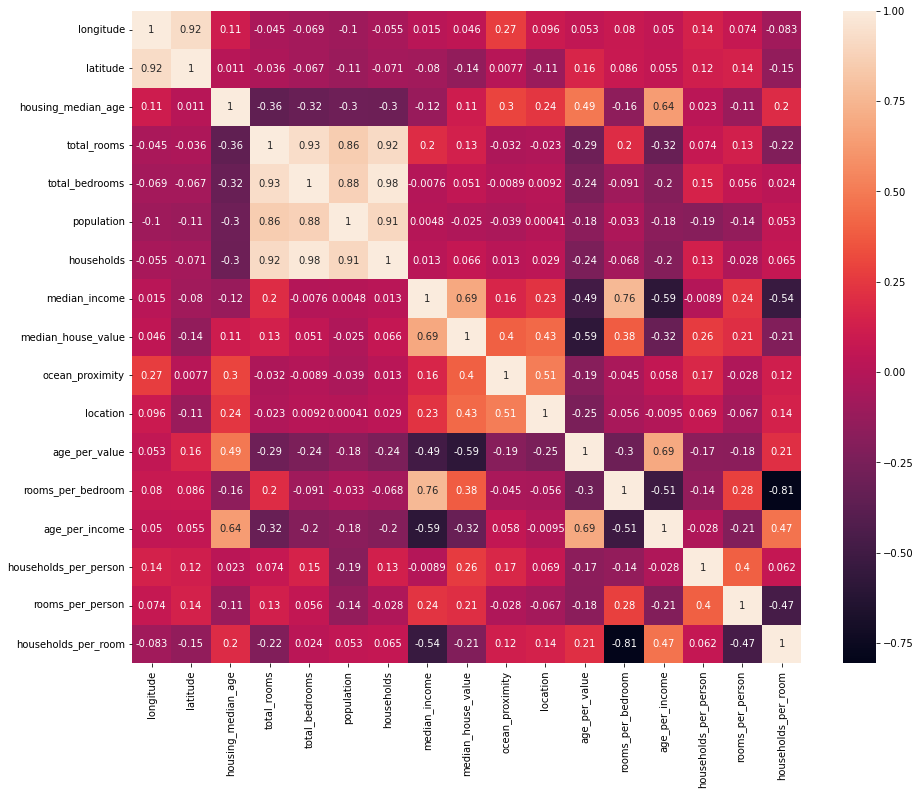

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True);

In [29]:
selected_cols = ['median_income', 'median_house_value', 'ocean_proximity', 'location', 
                 'age_per_value', 'rooms_per_bedroom', 'age_per_income', 'households_per_person', 
                 'rooms_per_person', 'households_per_room']

In [30]:
data_ = df[selected_cols]

In [31]:
data = data_.drop("median_house_value", axis=1)
data_lab = data_["median_house_value"]

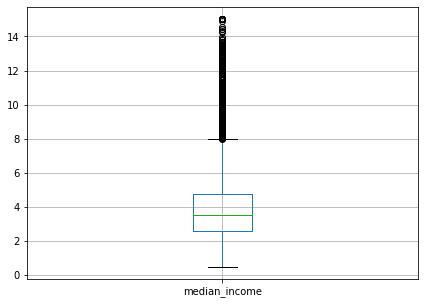

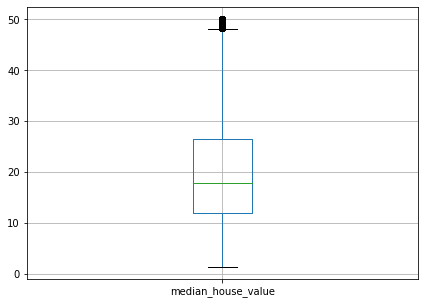

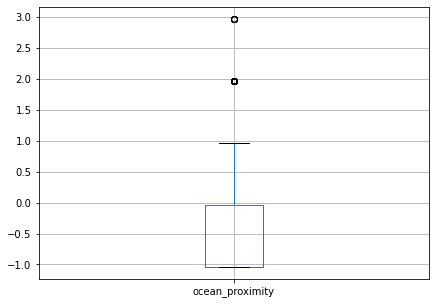

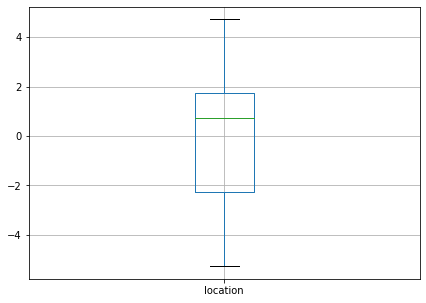

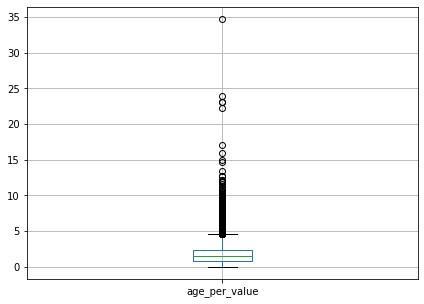

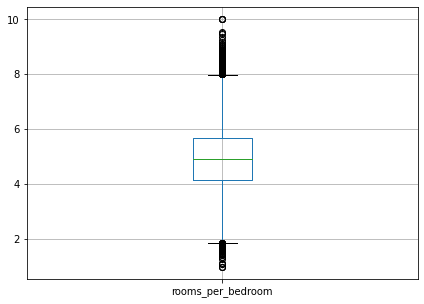

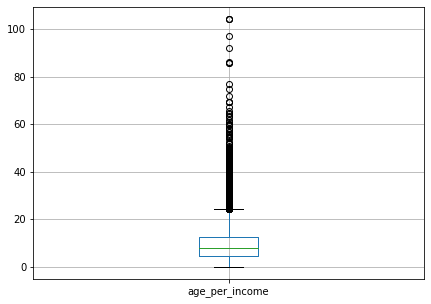

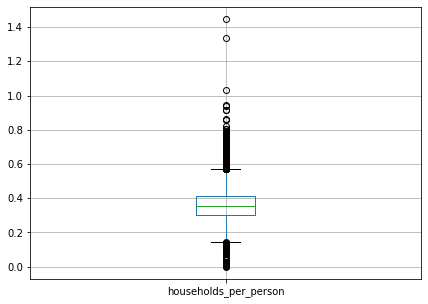

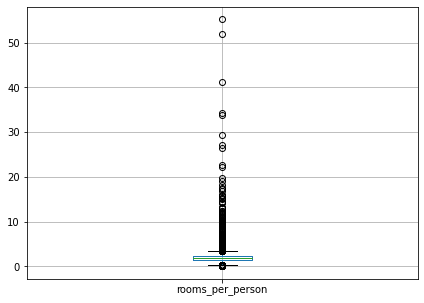

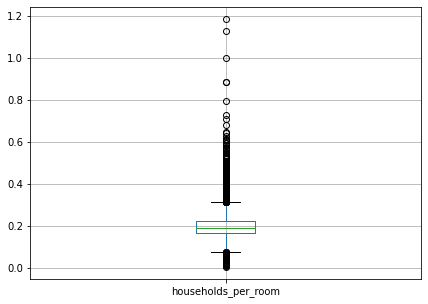

In [32]:
for i in data_.columns:
    data_[[i]].boxplot(figsize=(7,5))
    plt.show()

In [33]:
for k, v in data_.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc)) 

Column median_income outliers = 3.30%
Column median_house_value outliers = 5.19%
Column ocean_proximity outliers = 11.12%
Column location outliers = 0.00%
Column age_per_value outliers = 6.32%
Column rooms_per_bedroom outliers = 1.36%
Column age_per_income outliers = 4.16%
Column households_per_person outliers = 3.34%
Column rooms_per_person outliers = 1.95%
Column households_per_room outliers = 3.66%


In [34]:
for k, v in data_.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 3 * irq) | (v >= q3 + 3 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc)) 

Column median_income outliers = 0.68%
Column median_house_value outliers = 0.00%
Column ocean_proximity outliers = 0.02%
Column location outliers = 0.00%
Column age_per_value outliers = 1.39%
Column rooms_per_bedroom outliers = 0.00%
Column age_per_income outliers = 0.91%
Column households_per_person outliers = 0.24%
Column rooms_per_person outliers = 0.89%
Column households_per_room outliers = 0.73%


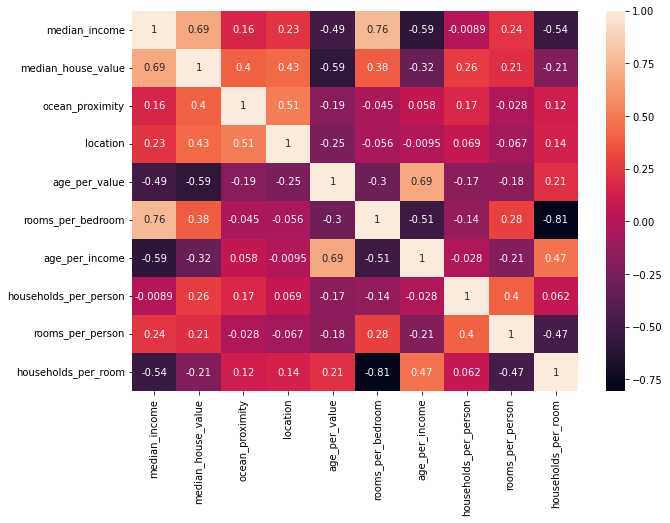

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(data_.corr(), annot=True);

**All columns are now better correlated with median_house_value**

median_income


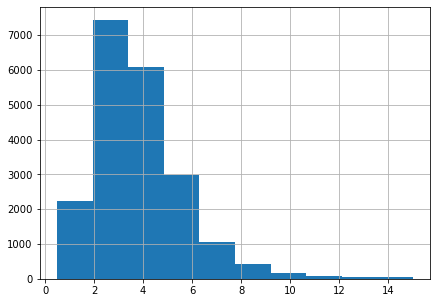

median_house_value


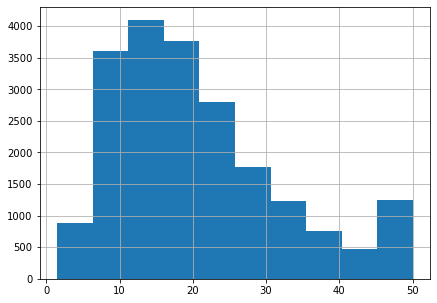

ocean_proximity


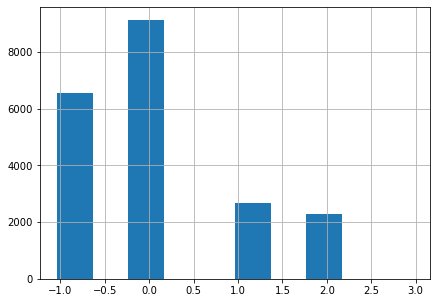

location


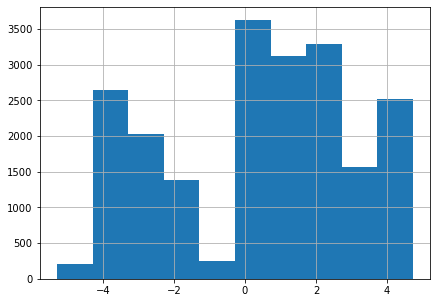

age_per_value


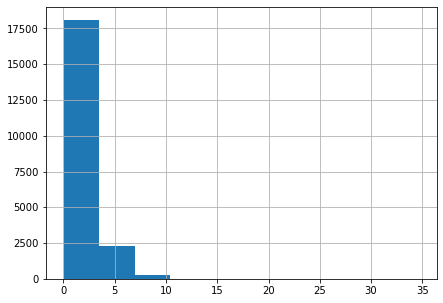

rooms_per_bedroom


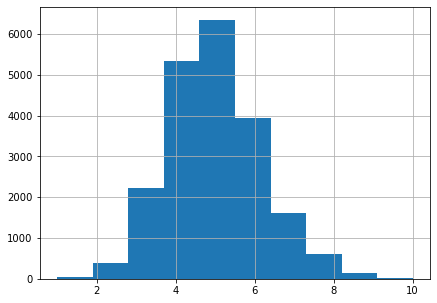

age_per_income


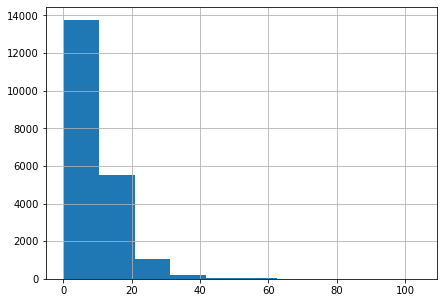

households_per_person


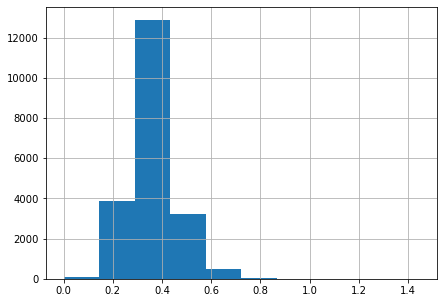

rooms_per_person


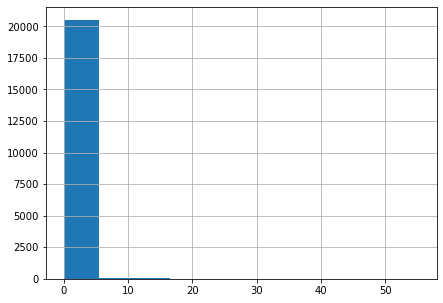

households_per_room


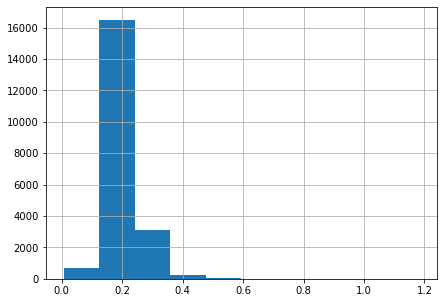

In [36]:
for i in data_.columns:
    print(i)
    data_[i].hist(figsize=(7,5))
    plt.show()

**Sensitivity Analysis**

<pre>
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load the data
data = pd.read_csv("data.csv")

# Fit the initial linear regression model
model = smf.ols("y ~ x", data=data).fit()

# Define the range of values for x
x_range = np.linspace(data['x'].min(), data['x'].max(), num=100)

# Define a function to calculate the regression results for a given value of x
def calc_regression(x):
    new_data = pd.DataFrame({'x': x})
    new_y = model.predict(new_data)
    return(new_y)

# Calculate the regression results for each value of x in the range
y_values = np.array(list(map(calc_regression, x_range)))

# Plot the sensitivity analysis results
plt.plot(x_range, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sensitivity Analysis')
plt.show()
</pre>

y refers to the name of the dependent variable and x refers to the name of the independent variable

y is dependent and target in regression, therefore y is median_house_value

In [37]:
import statsmodels.formula.api as smf

median_income


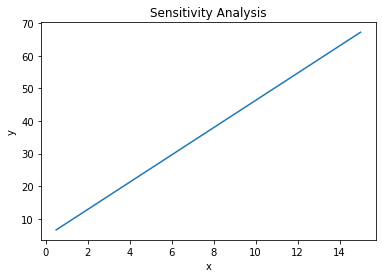

ocean_proximity


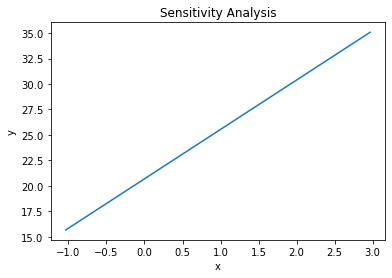

location


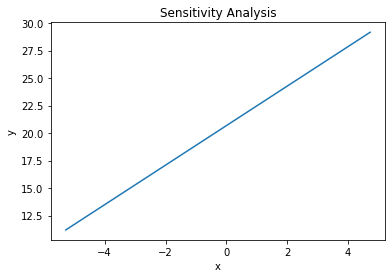

age_per_value


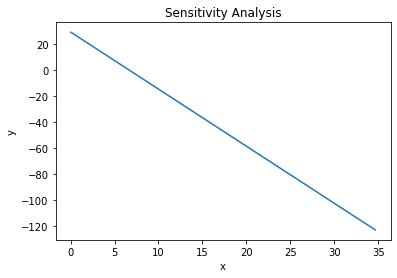

rooms_per_bedroom


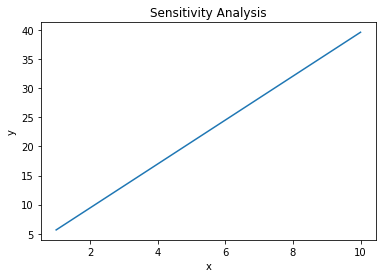

age_per_income


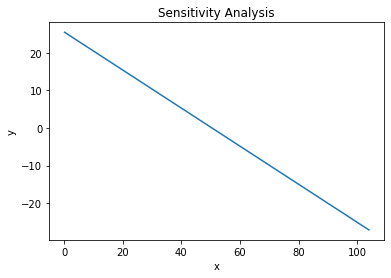

households_per_person


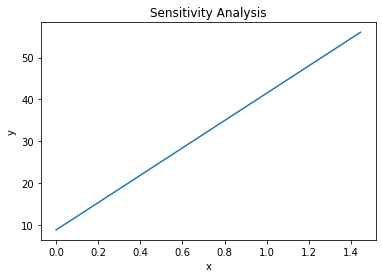

rooms_per_person


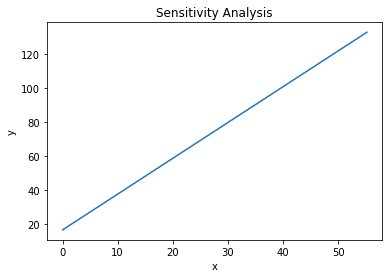

households_per_room


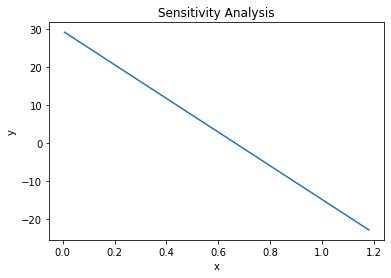

In [38]:
for i in data.columns:
    print(i)
    model = smf.ols("median_house_value ~ {}".format(i), data=data_).fit()

    x_range = np.linspace(data_[i].min(), data_[i].max(), num=100)

    def calc_regression(x):
        new_data = pd.DataFrame({i: x}, index=[0])
        new_y = model.predict(new_data)
        return(new_y)

    # Calculate the regression results for each value of x in the range
    y_values = np.array(list(map(calc_regression, x_range)))

    # Plot the sensitivity analysis results
    plt.plot(x_range, y_values)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sensitivity Analysis')
    plt.show()

In [39]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

In [40]:
PT1 = PowerTransformer(method="box-cox")
PT2 = PowerTransformer(method="box-cox")

In [41]:
cols_ = ["ocean_proximity","location"]

In [42]:
cols = ['median_income', 'age_per_value', 'rooms_per_bedroom', 'age_per_income', 
        'households_per_person', 'rooms_per_person', 'households_per_room']

In [43]:
tr_x, te_x, tr_y, te_y = train_test_split(data_[selected_cols], data_["median_house_value"], test_size=0.2)

In [44]:
tr_x = tr_x.reset_index(drop=True)
te_x = te_x.reset_index(drop=True)
tr_y = tr_y.reset_index(drop=True)
te_y = te_y.reset_index(drop=True)

In [45]:
tr_y.describe(), te_y.describe()

(count    16512.000000
 mean        20.706202
 std         11.513138
 min          1.499900
 25%         11.990000
 50%         18.030000
 75%         26.550000
 max         50.000100
 Name: median_house_value, dtype: float64,
 count    4128.000000
 mean       20.603101
 std        11.645697
 min         1.750000
 25%        11.907500
 50%        17.790000
 75%        26.242500
 max        50.000100
 Name: median_house_value, dtype: float64)

In [46]:
tr_cols_ = tr_x[cols_]

te_cols_ = te_x[cols_]

In [47]:
tr_y = tr_y.reset_index().assign(new_col=np.arange(5,(16512+5))).drop("index", axis=1)

In [48]:
te_y = te_y.reset_index().assign(new_col=np.arange(5,(4128+5))).drop("index", axis=1)

In [49]:
PT1.fit(tr_x[cols])

PowerTransformer(method='box-cox')

In [50]:
PT2.fit(tr_y.reset_index().assign(new_col=np.arange(5,(16512+5))).drop("index", axis=1))

PowerTransformer(method='box-cox')

In [51]:
tr_x = pd.DataFrame(PT1.transform(tr_x[cols]), columns=cols)
tr_x[cols_] = tr_cols_[cols_]
tr_y = pd.DataFrame(PT2.transform(tr_y), columns=tr_y.columns)

te_x = pd.DataFrame(PT1.transform(te_x[cols]), columns=cols)
te_x[cols_] = te_cols_[cols_]
te_y = pd.DataFrame(PT2.transform(te_y), columns=te_y.columns)

tr_y = tr_y[["median_house_value"]]
te_y = te_y[["median_house_value"]]

median_income


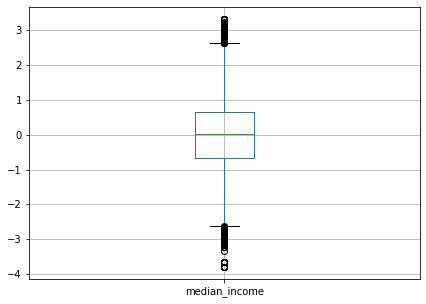

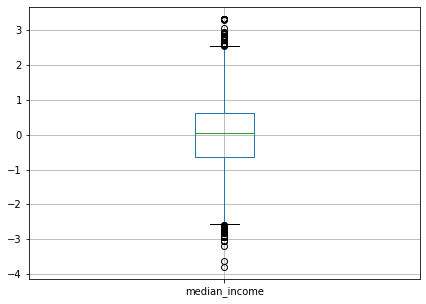

age_per_value


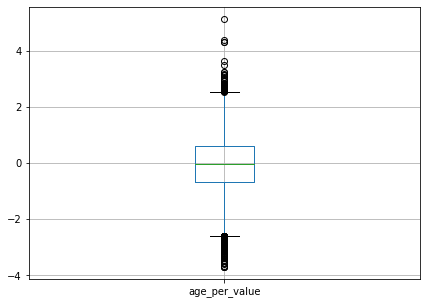

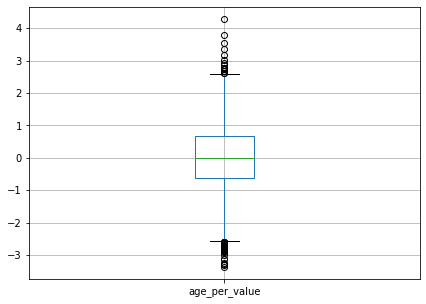

rooms_per_bedroom


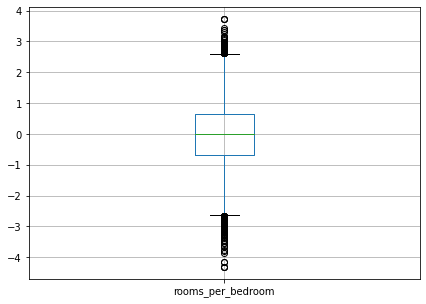

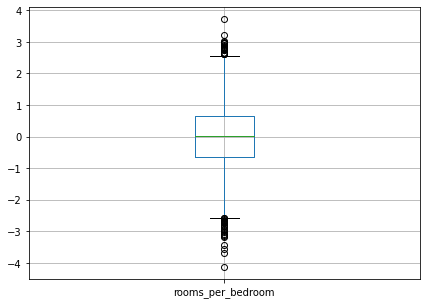

age_per_income


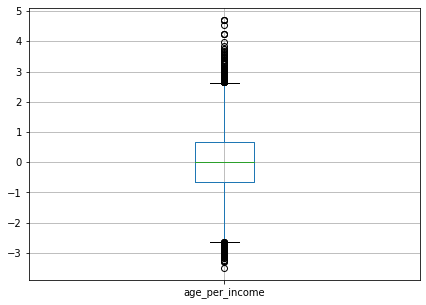

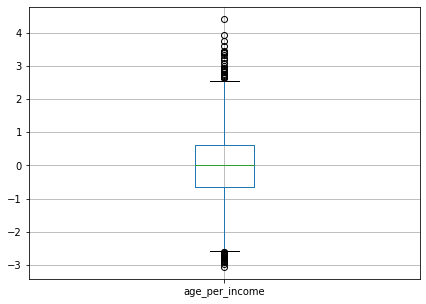

households_per_person


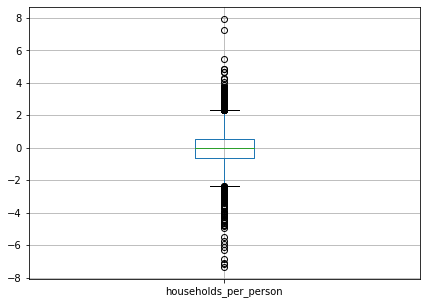

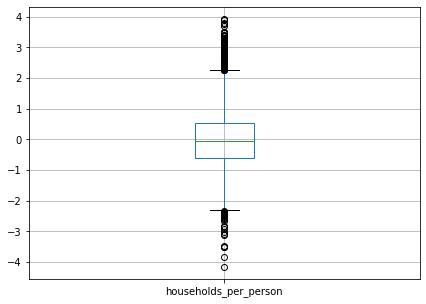

rooms_per_person


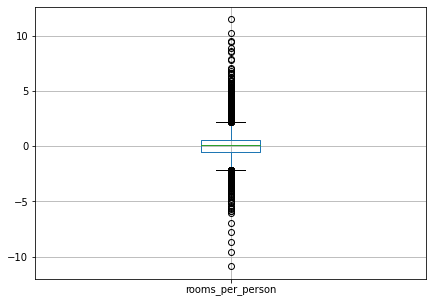

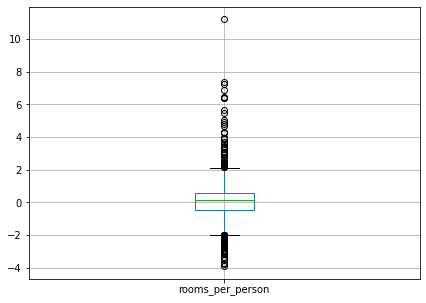

households_per_room


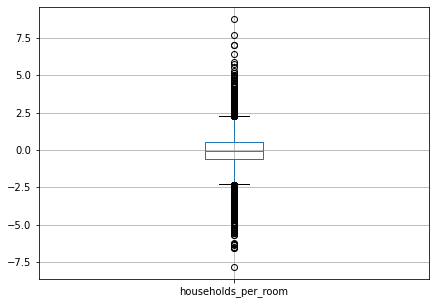

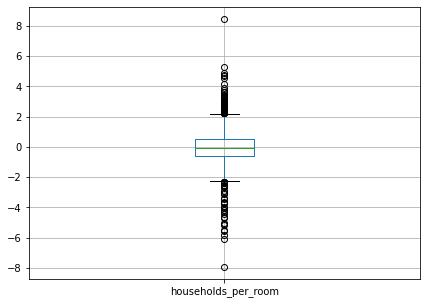

ocean_proximity


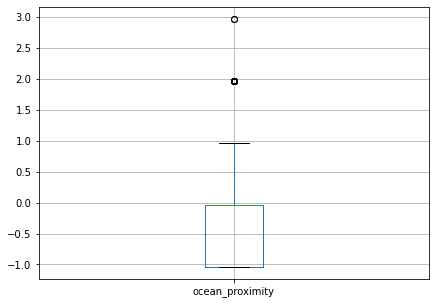

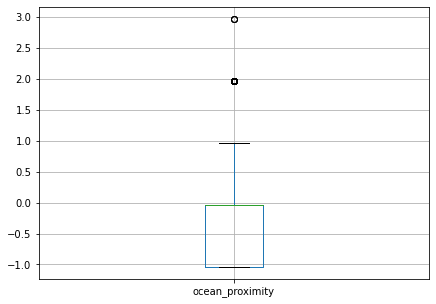

location


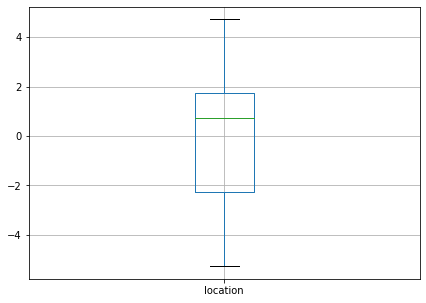

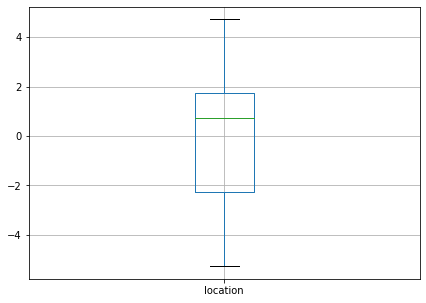

In [52]:
for i in tr_x:
    print(i)
    tr_x[[i]].boxplot(figsize=(7,5))
    plt.show()
    te_x[[i]].boxplot(figsize=(7,5))
    plt.show()

median_house_value


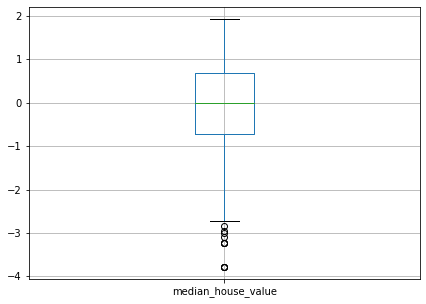

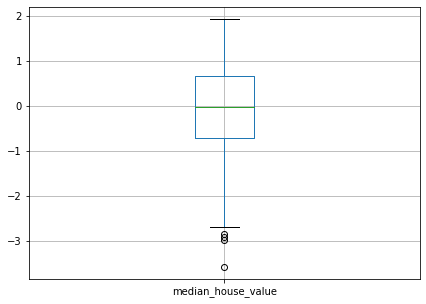

In [53]:
for i in tr_y:
    print(i)
    tr_y[[i]].boxplot(figsize=(7,5))
    plt.show()
    te_y[[i]].boxplot(figsize=(7,5))
    plt.show()

==============================================================================================

In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [55]:
rfr = RandomForestRegressor(n_estimators=501, max_depth=5, min_samples_leaf=2, max_features=3, 
                            verbose=True, random_state=27)

In [56]:
rfr.fit(tr_x, tr_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 501 out of 501 | elapsed:   11.4s finished


RandomForestRegressor(max_depth=5, max_features=3, min_samples_leaf=2,
                      n_estimators=501, random_state=27, verbose=True)

In [57]:
rfr.score(tr_x,tr_y), rfr.score(te_x,te_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 501 out of 501 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 501 out of 501 | elapsed:    0.1s finished


(0.8098942191890934, 0.8030440584689368)

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**TRAIN**

In [59]:
pred = rfr.predict(tr_x)
true = tr_y

print("MEAN SQUARE ERROR", mean_squared_error(true, pred))
print("ROOT MEAN SQUARE ERROR", mean_squared_error(true, pred, squared=False))
print("MEAN ABSOLUTE ERROR", mean_absolute_error(true, pred))
print("R SQUARED", r2_score(true, pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MEAN SQUARE ERROR 0.19010578081090665
ROOT MEAN SQUARE ERROR 0.43601121638199475
MEAN ABSOLUTE ERROR 0.33225974778278594
R SQUARED 0.8098942191890934


[Parallel(n_jobs=1)]: Done 501 out of 501 | elapsed:    0.6s finished


**TEST**

In [60]:
pred = rfr.predict(te_x)
true = te_y

print("MEAN SQUARE ERROR", mean_squared_error(true, pred))
print("ROOT MEAN SQUARE ERROR", mean_squared_error(true, pred, squared=False))
print("MEAN ABSOLUTE ERROR", mean_absolute_error(true, pred))
print("R SQUARED", r2_score(true, pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MEAN SQUARE ERROR 0.20075767131406136
ROOT MEAN SQUARE ERROR 0.4480598970160813
MEAN ABSOLUTE ERROR 0.3399453173015234
R SQUARED 0.8030440584689368


[Parallel(n_jobs=1)]: Done 501 out of 501 | elapsed:    0.1s finished


**RMSE lies between 0.2 to 0.5 --> We can rely on the above model**

===============================================================================================

In [61]:
gbr = GradientBoostingRegressor(n_estimators=501, max_depth=5, min_samples_leaf=2, max_features=3, 
                            verbose=True, random_state=27)

In [62]:
gbr.fit(tr_x, tr_y)

      Iter       Train Loss   Remaining Time 
         1           0.8603           25.49s
         2           0.7405           23.98s
         3           0.6460           22.61s
         4           0.5692           21.98s
         5           0.5015           20.89s
         6           0.4471           20.92s
         7           0.3972           21.05s
         8           0.3582           20.42s
         9           0.3231           19.86s
        10           0.2933           20.21s
        20           0.1581           20.84s
        30           0.1060           21.15s
        40           0.0787           19.52s
        50           0.0617           18.66s
        60           0.0490           18.17s
        70           0.0402           18.05s
        80           0.0334           17.33s
        90           0.0276           16.65s
       100           0.0236           16.17s
       200           0.0076           11.58s
       300           0.0040            7.83s
       40

GradientBoostingRegressor(max_depth=5, max_features=3, min_samples_leaf=2,
                          n_estimators=501, random_state=27, verbose=True)

In [63]:
gbr.score(tr_x,tr_y), gbr.score(te_x,te_y)

(0.9979021894481046, 0.9923526138147454)

In [64]:
pred = gbr.predict(tr_x)
true = tr_y

print("MEAN SQUARE ERROR", mean_squared_error(true, pred))
print("ROOT MEAN SQUARE ERROR", mean_squared_error(true, pred, squared=False))
print("MEAN ABSOLUTE ERROR", mean_absolute_error(true, pred))
print("R SQUARED", r2_score(true, pred))

MEAN SQUARE ERROR 0.0020978105518953834
ROOT MEAN SQUARE ERROR 0.045801861882410234
MEAN ABSOLUTE ERROR 0.035940722361793055
R SQUARED 0.9979021894481046


In [65]:
pred = gbr.predict(te_x)
true = te_y

print("MEAN SQUARE ERROR", mean_squared_error(true, pred))
print("ROOT MEAN SQUARE ERROR", mean_squared_error(true, pred, squared=False))
print("MEAN ABSOLUTE ERROR", mean_absolute_error(true, pred))
print("R SQUARED", r2_score(true, pred))

MEAN SQUARE ERROR 0.007794999380350828
ROOT MEAN SQUARE ERROR 0.08828929369040636
MEAN ABSOLUTE ERROR 0.06262567975446674
R SQUARED 0.9923526138147454


==============================================================================================

In [66]:
output = te_x
output["true"] = te_y["median_house_value"]
output["pred"] = pred

In [67]:
output.head(10)

,median_income,age_per_value,rooms_per_bedroom,age_per_income,households_per_person,rooms_per_person,households_per_room,ocean_proximity,location,true,pred
0,0.433104,-0.203623,-0.530700,-0.824441,0.050279,0.074035,-0.072731,-0.034012,-0.279845,-0.513871,-0.436289
1,0.662820,-0.197511,0.515660,-0.596920,-0.275701,0.106426,-0.425542,-0.034012,-0.279845,0.003103,0.097569
2,0.301593,-0.411267,-0.504866,-0.243135,0.604204,0.395203,-0.020780,-0.034012,-0.279845,0.532094,0.456466
3,-0.313070,-0.677463,0.248239,-1.260003,-0.559899,-0.231400,-0.232283,-1.034012,-5.279845,-1.130113,-1.077326
4,-0.595911,0.435772,0.470537,0.708320,-0.894465,-0.337258,-0.424491,-1.034012,-3.279845,-0.158345,-0.171779
5,0.259874,0.457217,0.004339,0.172447,-1.970853,-1.491486,0.047154,-0.034012,-0.279845,-0.135222,-0.107925
6,0.353946,-0.731026,0.974562,-1.079462,0.152289,0.667299,-0.781151,-1.034012,-5.279845,-0.238141,-0.174650
7,0.696670,0.155054,1.052344,-0.058648,-0.203635,0.365395,-0.706399,-0.034012,2.720155,0.317354,0.304656
8,0.560617,-1.277083,-0.476701,-0.648860,1.523634,0.655129,0.391582,1.965988,0.720155,1.523509,1.503338
9,-0.371316,1.600870,-0.278516,0.934703,-0.228394,-0.480520,0.468115,-0.034012,1.720155,-1.093798,-1.019511


**GradientBoostRegressor is a lot better performing than RandomForestRegressor**

================================================================================================